In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.io.cif import CifParser
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from scipy.constants import hbar, elementary_charge
from pymatgen.core.structure import Structure
from pymatgen.electronic_structure.bandstructure import BandStructure
import json

In [2]:
with MPRester("903fk7jExqhMBNCB46b") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-862947")

In [3]:
#Détermination de la bande interdite
band_gap = bandstructure.get_band_gap()
print("Bande interdite : ", band_gap['energy'], "eV")

Bande interdite :  0.4192 eV


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

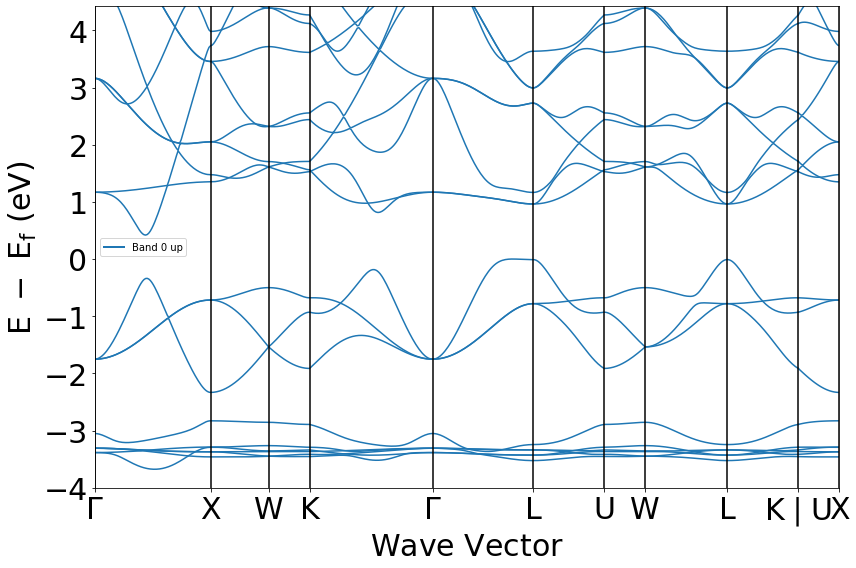

In [4]:
bsplot = BSPlotter(bandstructure)
bsplot.get_plot()

In [ ]:
### Cette partie du code ne fonctionne pas mais je n'ai pas su résoudre l'erreur dans les temps ###

# Obtenir les données de la bande de valence et de conduction
vbm_data = bandstructure.get_vbm()
cbm_data = bandstructure.get_cbm()
vbm_energy = vbm_data["energy"]
cbm_energy = cbm_data["energy"]

#dispersion pour chaque bande
valence_band_dispersion = [max(band["energy"]) - min(band["energy"]) for band in vbm_data["bands"]]
conduction_band_dispersion = [max(band["energy"]) - min(band["energy"]) for band in cbm_data["band_index"]]

#Calculer les max et min
valence_max_dispersion_index = valence_band_dispersion.index(max(valence_band_dispersion))
valence_min_dispersion_index = valence_band_dispersion.index(min(valence_band_dispersion))
conduction_max_dispersion_index = conduction_band_dispersion.index(max(conduction_band_dispersion))
conduction_min_dispersion_index = conduction_band_dispersion.index(min(conduction_band_dispersion))


print("Direction de la plus grande dispersion de la bande de valence : ", vbm_data["kpoints"][valence_max_dispersion_index])
print("Direction de la plus petite dispersion de la bande de valence : ", vbm_data["kpoints"][valence_min_dispersion_index])
print("Direction de la plus grande dispersion de la bande de conduction : ", cbm_data["kpoints"][conduction_max_dispersion_index])
print("Direction de la plus petite dispersion de la bande de conduction : ", cbm_data["kpoints"][conduction_min_dispersion_index])

In [ ]:
### Je ne suis pas arrivée à créer le tableau énergies, j'ai essayé avec VASPRUN snas succès ###

# On charge les données à partir d'un fichier JSON
data = {
    "energy": energies,
    "distances": distances,
    "vbm": vbm,
    "cbm": cbm,
    "lattice_rec": structure.reciprocal_lattice,
    "labels_dict": labels_dict
}

bs = BandStructureSymmLine.from_dict(data)
bsplot = BSPlotter(bs)

# On récupère les données de la bande
data = bsplot.bs_plot_data()

# On récupère l'énergie du maximum de la dernière bande de valence (en eV) et le vecteur d'onde correspondant
cbm = bs.get_cbm()
E0 = cbm["energy"]
k0 = cbm["kpoint"].frac_coords

# On définit les constantes physiques nécessaires
m0 = 9.10938356e-31  # masse de l'électron (en kg)
a = bs.structure.lattice.matrix[0, 0] * 1e-10  # constante de maille (en m)
hbar = 1.0545718e-34  # constante de Planck réduite (en J.s)
eV = 1.60218e-19  # conversion eV -> J

# On calcule la masse effective parabolique
me = hbar**2 * np.sum(k0**2) / (2 * m0 * a**2 * E0 * eV)
print("Masse effective parabolique : {:.3} m_e".format(me))